# Template matching

In [9]:
'''
Object detection by template matching
follow: https://www.youtube.com/watch?v=P5FTEryiTl4
'''
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path


script_dir = Path("D:\\VSC\\machine-learning-crash-course\\deep-neural-networks\\computer-vision\\template_matching.ipynb").resolve()
project_root = script_dir.parent.parent.parent
img_dir = os.path.join(project_root, "images")

In [10]:
img_rgb = cv2.imread(os.path.join(img_dir, 'f16.jpg')) # BGR
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(os.path.join(img_dir, 'f16_template.jpg'), 0 )


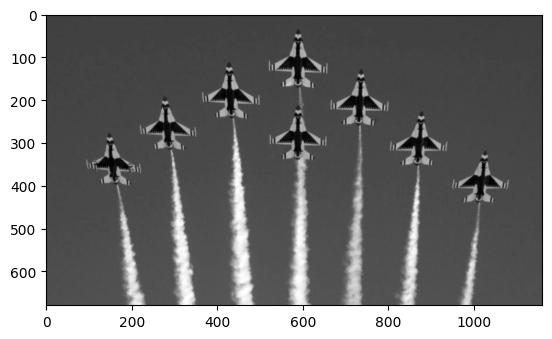

In [11]:
plt.imshow(img_gray, cmap='gray')

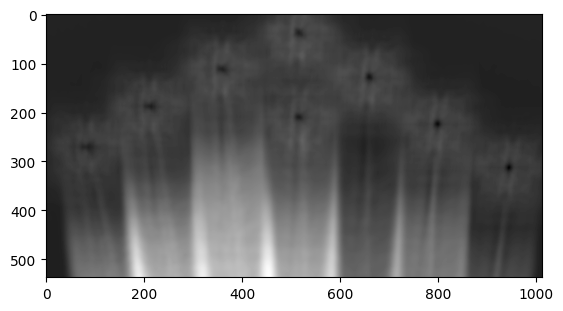

In [12]:
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
plt.imshow(res, cmap='gray')

In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = [top_left[0] + w, top_left[1] + h]
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)

cv2.imshow("matched",img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

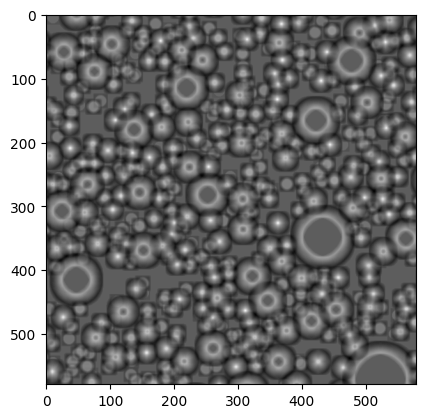

In [7]:
import numpy as np

img_rgb = cv2.imread(os.path.join(img_dir, "bubbles.png"))
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(os.path.join(img_dir, "bubbles_template.png"), 0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res,cmap='gray')

threshold = 0.8
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imshow("matched",img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

# Multi-scale Template Matching

In [36]:
# import the necessary packages
import numpy as np
import imutils
import glob
import cv2


# load the image image, convert it to grayscale, and detect edges
template = cv2.imread("D:\\VSC\\machine-learning-crash-course\\images\\finding_15\\template\\tutu.png", 0)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
image = cv2.imread("D:\\VSC\\machine-learning-crash-course\\images\\finding_15\\finding.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None
# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
	# resize the image according to the scale, and keep track
	# of the ratio of the resizing
	resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
	r = gray.shape[1] / float(resized.shape[1])
	# if the resized image is smaller than the template, then break
	# from the loop
	if resized.shape[0] < tH or resized.shape[1] < tW:
		break

	# detect edges in the resized, grayscale image and apply template
	# matching to find the template in the image
	edged = cv2.Canny(resized, 50, 200)
	result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
	(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)	
	# draw a bounding box around the detected region
	clone = np.dstack([edged, edged, edged])
	# cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
	# cv2.imshow("Visualize", clone)
	# cv2.waitKey(0)
	# if we have found a new maximum correlation value, then update
	# the bookkeeping variable
	if found is None or maxVal > found[0]:
		found = (maxVal, maxLoc, r)
	# unpack the bookkeeping variable and compute the (x, y) coordinates
	# of the bounding box based on the resized ratio
	(_, maxLoc, r) = found
	(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
	(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

# draw a bounding box around the detected result and display the image
cv2.namedWindow("Matched", cv2.WINDOW_NORMAL)
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
cv2.imshow("Matched", image)
cv2.waitKey(0)
cv2.destroyAllWindows()